In [3]:
import pandas as pd
print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached regex-2025.9.18-cp313-cp313-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached regex-2025.9.18-cp313-cp313-win_amd64.whl (275 kB)

   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   --------

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\murmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murmu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Load the CSV
df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/tickets.csv")
print(df.head(10))

                                            text         category
0                    I can't login to my account    Account Issue
1            My internet connection is very slow    Network Issue
2               Please help me reset my password    Account Issue
3              I was overcharged on my last bill    Billing Issue
4          The app keeps crashing when I open it  Technical Issue
5  My payment failed but the amount was deducted    Billing Issue
6        Unable to send messages through the app  Technical Issue
7           Payment failed while purchasing plan    Billing Issue
8                    Charged twice for one order    Billing Issue
9            Money deducted but order not placed    Billing Issue


In [8]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [9]:
print(stop_words)

{'about', "that'll", 'those', "i've", 'our', 'these', 'shouldn', 'their', 'only', "hasn't", 'then', 'for', 'both', 'is', 'myself', 'she', "don't", 'can', 'into', "wasn't", "i'd", 'its', 'yours', 'against', 'themselves', 't', 'through', 'to', "they'd", "they'll", "you're", 'them', "should've", 'why', 'and', 'when', 'after', 'being', "i'm", "hadn't", 'aren', 'once', "shouldn't", 'hasn', 'we', 'here', 'have', "wouldn't", 'him', 'itself', 'll', 'mightn', 'they', 'needn', 'or', 'having', 'each', 'won', 'during', 'if', "shan't", 'my', 'at', 'isn', 'not', 'himself', 'any', "isn't", 'above', 'been', 'do', 'below', 'same', 'ain', 'be', 'o', 'with', 'are', "they've", 'under', 'you', 'hers', "she'll", 'did', 'before', 'the', 'd', "couldn't", 'where', "needn't", 'doesn', 'down', 'out', 'on', 've', "you'd", 'yourself', 'just', "we're", 'your', 'this', "we've", 'what', 'an', 'as', 'over', "it'll", 'couldn', 'm', 'off', 'ourselves', 'shan', 'such', 'but', "doesn't", "we'll", "haven't", "aren't", "it'

In [10]:
def clean_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

In [11]:
df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text']].head(10))

                                            text  \
0                    I can't login to my account   
1            My internet connection is very slow   
2               Please help me reset my password   
3              I was overcharged on my last bill   
4          The app keeps crashing when I open it   
5  My payment failed but the amount was deducted   
6        Unable to send messages through the app   
7           Payment failed while purchasing plan   
8                    Charged twice for one order   
9            Money deducted but order not placed   

                       clean_text  
0              cant login account  
1        internet connection slow  
2      please help reset password  
3           overcharged last bill  
4         app keeps crashing open  
5  payment failed amount deducted  
6        unable send messages app  
7  payment failed purchasing plan  
8         charged twice one order  
9     money deducted order placed  


In [12]:
print("Missing values:", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values: text          0
category      0
clean_text    0
dtype: int64
Duplicate rows: 0


In [13]:
df.to_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/cleaned_tickets.csv", index=False)
print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!


In [14]:
df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/tickets.csv")
print(df['category'].value_counts())

category
Account Issue       5
Billing Issue       5
 Account Issue      5
Technical Issue     5
Network Issue       4
 Technical Issue    1
Name: count, dtype: int64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle
import os

# 1️⃣ Load dataset
df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/tickets.csv")

# Optional cleaning
df.dropna(inplace=True)

# 2️⃣ Split data
X = df["text"]        # change column name if needed (e.g., 'text' or 'complaint')
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Vectorize text
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4️⃣ Train balanced model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 5️⃣ Evaluate model
y_pred = model.predict(X_test_tfidf)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6️⃣ Save model & vectorizer
os.makedirs("model", exist_ok=True)
with open("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/model/ticket_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

with open("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("\n✅ Model and vectorizer saved successfully!")


✅ Accuracy: 0.8

Classification Report:
                  precision    recall  f1-score   support

  Account Issue       0.50      1.00      0.67         1
  Account Issue       1.00      0.50      0.67         2
  Billing Issue       1.00      1.00      1.00         1
Technical Issue       1.00      1.00      1.00         1

       accuracy                           0.80         5
      macro avg       0.88      0.88      0.83         5
   weighted avg       0.90      0.80      0.80         5


✅ Model and vectorizer saved successfully!


In [16]:
df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/tickets.csv")
print(df.head())
print(df.tail())
print("\nCategory distribution:\n", df['category'].value_counts())

                                    text         category
0            I can't login to my account    Account Issue
1    My internet connection is very slow    Network Issue
2       Please help me reset my password    Account Issue
3      I was overcharged on my last bill    Billing Issue
4  The app keeps crashing when I open it  Technical Issue
                                text          category
20        Password reset not working     Account Issue
21       Forgot my login credentials     Account Issue
22             My account got locked     Account Issue
23  I can’t sign in even after reset     Account Issue
24   computer can't working properly   Technical Issue

Category distribution:
 category
Account Issue       5
Billing Issue       5
 Account Issue      5
Technical Issue     5
Network Issue       4
 Technical Issue    1
Name: count, dtype: int64


In [17]:
X = df["text"]
y = df["category"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle, os

df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/tickets.csv")

X = df["text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("Model trained successfully!")

os.makedirs("model", exist_ok=True)
with open("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/model/ticket_classifier.pkl", "wb") as f:
    pickle.dump(model, f)
with open("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved!")


Model trained successfully!
✅ Model and vectorizer saved!


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle, os

# Load dataset
df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/tickets.csv")
df.dropna(inplace=True)

# ✅ Correct column names
X = df["text"]
y = df["category"]


In [20]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8

Classification Report:
                  precision    recall  f1-score   support

  Account Issue       0.50      1.00      0.67         1
  Account Issue       1.00      0.50      0.67         2
  Billing Issue       1.00      1.00      1.00         1
Technical Issue       1.00      1.00      1.00         1

       accuracy                           0.80         5
      macro avg       0.88      0.88      0.83         5
   weighted avg       0.90      0.80      0.80         5



In [22]:
os.makedirs("model", exist_ok=True)
with open("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/model/ticket_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

with open("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("\n✅ Model updated successfully!")



✅ Model updated successfully!


Classification Report:
                 precision    recall  f1-score   support

  Account Issue       0.50      1.00      0.67         1
  Account Issue       1.00      0.50      0.67         2
  Billing Issue       1.00      1.00      1.00         1
Technical Issue       1.00      1.00      1.00         1

       accuracy                           0.80         5
      macro avg       0.88      0.88      0.83         5
   weighted avg       0.90      0.80      0.80         5



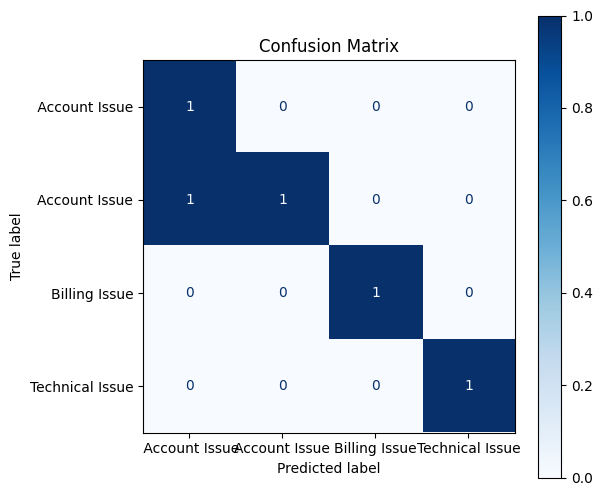

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict on vectorized test data
X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)

# Generate metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
labels = np.unique(np.concatenate((y_test, y_pred)))  # ensures all present labels included
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()